Số contours tìm được: 6


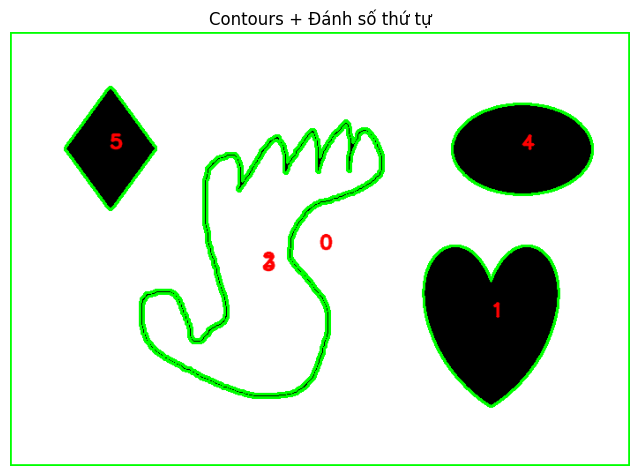

In [196]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Đọc ảnh
im = cv.imread(r"D:\Documents\workspace\ThiGiacMayTinh\ComputerVision2025\img\1.png") 

# Chuyển sang ảnh xám
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Nhị phân hóa
ret, thresh = cv.threshold(imgray, 127, 255, 0)

# Tìm contours
contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

print("Số contours tìm được:", len(contours))

# Copy ảnh để vẽ
im_draw = im.copy()

for i, cnt in enumerate(contours):
    # Vẽ contour (màu xanh lá)
    cv.drawContours(im_draw, [cnt], -1, (0,255,0), 2)

    # Tìm tâm contour để đặt số thứ tự
    M = cv.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
    else:
        cx, cy = cnt[0][0]  # lấy 1 điểm bất kỳ nếu không tính được tâm

    cv.putText(im_draw, str(i), (cx, cy), cv.FONT_HERSHEY_SIMPLEX, 
               0.7, (0,0,255), 2, cv.LINE_AA)

# Hiển thị ảnh
plt.figure(figsize=(8,8))
plt.imshow(cv.cvtColor(im_draw, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Contours + Đánh số thứ tự")
plt.show()



===== Contour 0 =====
Moments: {'m00': 344682.0, 'm10': 120983382.0, 'm01': 84619431.0, 'm20': 56620222776.0, 'm11': 29701420281.0, 'm02': 27698760414.0, 'm30': 29810547291564.0, 'm21': 13900264691508.0, 'm12': 9722264905314.0, 'm03': 10200068522455.5, 'mu20': 14155055694.0, 'mu11': 0.0, 'mu02': 6924690103.5, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.11914460285132382, 'nu11': 0.0, 'nu02': 0.058285849952516615, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
Diện tích: 344682.0
Tâm: (351, 245)
Chu vi: 2386.0


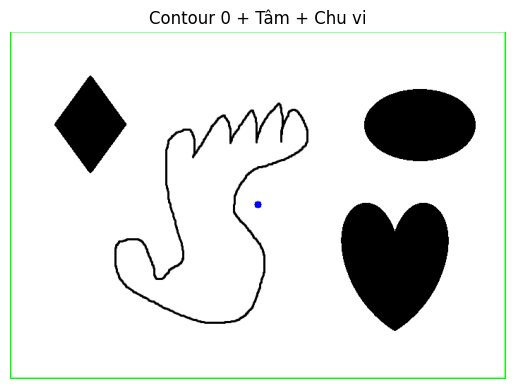

In [197]:
# Phân tích contour thứ i
# ======================
i = 0  # chọn contour số 0
cnt = contours[i]

# Moments
M = cv.moments(cnt)
print(f"\n===== Contour {i} =====")
print("Moments:", M)

# Diện tích
area = cv.contourArea(cnt)
print("Diện tích:", area)

# Tâm
if M['m00'] != 0:
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print(f"Tâm: ({cx}, {cy})")
else:
    cx, cy = 0, 0
    print("Không tính được tâm vì m00=0")

# Chu vi
perimeter = cv.arcLength(cnt, True)
print("Chu vi:", perimeter)

# Vẽ contour và tâm
img_copy = im.copy()
cv.drawContours(img_copy, [cnt], -1, (0,255,0), 2)  # viền xanh lá
cv.circle(img_copy, (cx, cy), 5, (255,0,0), -1)     # tâm đỏ

plt.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Contour {i} + Tâm + Chu vi")
plt.show()


===== Contour 3 =====
Moments: {'m00': 36547.5, 'm10': 10453215.833333332, 'm01': 9837229.166666666, 'm20': 3099093189.25, 'm11': 2746802213.7916665, 'm02': 2906081730.583333, 'm30': 948301249504.75, 'm21': 794524594125.5834, 'm12': 798998989990.9166, 'm03': 918343945234.75, 'mu20': 109293031.69474554, 'mu11': -66815124.77125692, 'mu02': 258265117.20301056, 'mu30': -612282025.7957764, 'mu21': -1415595249.2855835, 'mu12': 3777752676.5760345, 'mu03': -2896036930.256714, 'nu20': 0.08182332497767571, 'nu11': -0.050021813676574434, 'nu02': 0.19335277178806087, 'nu30': -0.002397768903178226, 'nu21': -0.0055436385933627635, 'nu12': 0.014794126742524427, 'nu03': -0.011341223490596837}
Diện tích: 36547.5
Tâm: (286, 269)
Chu vi: 1470.1534496545792


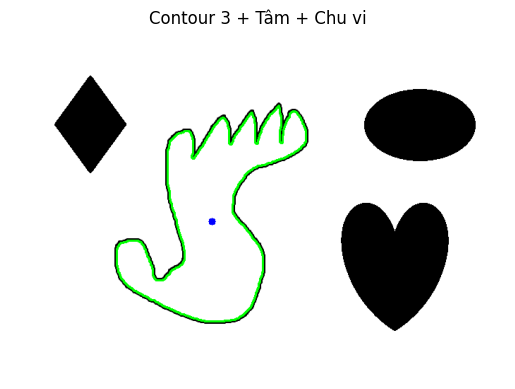

In [198]:
# Phân tích contour thứ i
# ======================
i = 3  # chọn contour số 0
cnt = contours[i]

# 1. Moments
M = cv.moments(cnt)
print(f"\n===== Contour {i} =====")
print("Moments:", M)

# 2. Contour Area
area = cv.contourArea(cnt)
print("Diện tích:", area)

# Tâm
if M['m00'] != 0:
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print(f"Tâm: ({cx}, {cy})")
else:
    cx, cy = 0, 0
    print("Không tính được tâm vì m00=0")

# Contour Perimeter
perimeter = cv.arcLength(cnt, True)
print("Chu vi:", perimeter)

# Vẽ contour và tâm
img_copy = im.copy()
cv.drawContours(img_copy, [cnt], -1, (0,255,0), 2)  # viền xanh lá
cv.circle(img_copy, (cx, cy), 5, (255,0,0), -1)     # tâm đỏ

plt.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Contour {i} + Tâm + Chu vi")
plt.show()

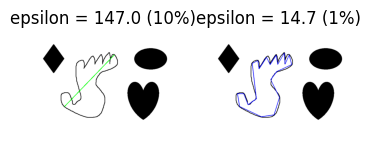

In [199]:
# 4. Contour Approximation
# Xấp xỉ với epsilon = 10% và 1%
epsilon1 = 0.1 * perimeter
epsilon2 = 0.01 * perimeter
approx1 = cv.approxPolyDP(cnt, epsilon1, True)
approx2 = cv.approxPolyDP(cnt, epsilon2, True)
# Vẽ kết quả
img1 = im.copy()
cv.drawContours(img1, [approx1], -1, (0,255,0), 2)  # xấp xỉ thô

img2 = im.copy()
cv.drawContours(img2, [approx2], -1, (255,0,0), 2)  # xấp xỉ mịn

plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title(f"epsilon = {epsilon1:.1f} (10%)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title(f"epsilon = {epsilon2:.1f} (1%)")
plt.axis("off")

plt.show()

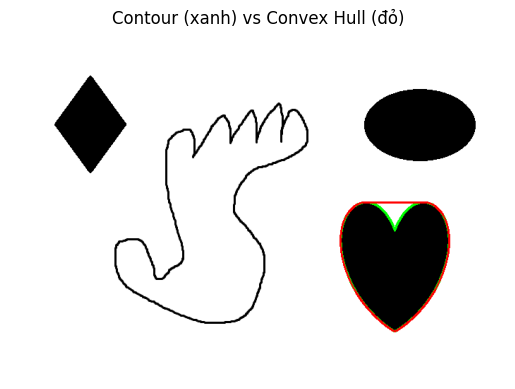

In [200]:
# 5. Convex Hull
cnt = contours[1]
# Vẽ contour (xanh) và convex hull (đỏ)
im_draw = im.copy()
cv.drawContours(im_draw, [cnt], -1, (0,255,0), 2)  # contour xanh
hull = cv.convexHull(cnt)
cv.drawContours(im_draw, [hull], -1, (0,0,255), 2)  # convex hull đỏ

# Hiển thị kết quả
plt.imshow(cv.cvtColor(im_draw, cv.COLOR_BGR2RGB))
plt.title("Contour (xanh) vs Convex Hull (đỏ)")
plt.axis("off")
plt.show()

Contour 0 convex? True
Contour 1 convex? False
Contour 2 convex? False
Contour 3 convex? False
Contour 4 convex? True
Contour 5 convex? True


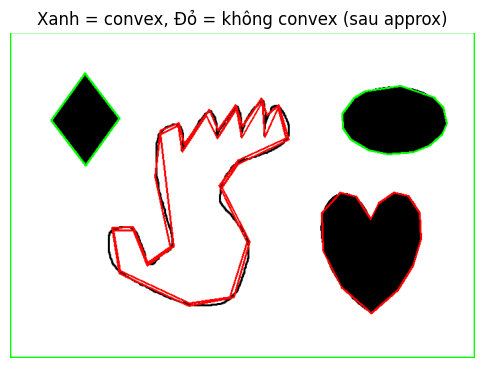

In [201]:
# 6. Checking Convexity
# Copy ảnh để vẽ
im_draw = im.copy()

for i, cnt in enumerate(contours):
    # Làm mượt contour
    epsilon = 0.01 * cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, epsilon, True)

    # Kiểm tra convexity
    k = cv.isContourConvex(approx)
    print(f"Contour {i} convex? {k}")

    # Màu xanh nếu convex, đỏ nếu không convex
    color = (0,255,0) if k else (0,0,255)
    cv.drawContours(im_draw, [approx], -1, color, 2)

# Hiển thị
plt.figure(figsize=(6,6))
plt.imshow(cv.cvtColor(im_draw, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Xanh = convex, Đỏ = không convex (sau approx)")
plt.show()

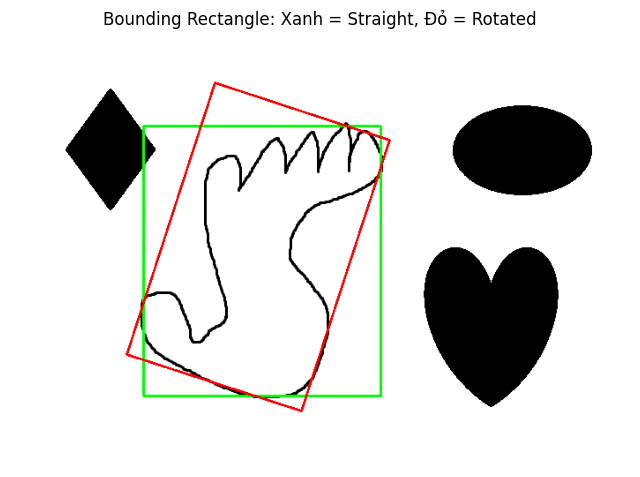

In [202]:
# 7. Bounding Rectangle
im_draw = im.copy()

# Lấy contour thứ 0 (bạn có thể thay đổi i để xem contour khác)
i = 3
cnt = contours[i]

# 7.a Straight Bounding Rectangle (Xanh lá)
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(im_draw,(x,y),(x+w,y+h),(0,255,0),2)

# 7.b Rotated Rectangle (Đỏ)
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = box.astype(int)
cv.drawContours(im_draw,[box],0,(0,0,255),2)

# Hiển thị ảnh
plt.figure(figsize=(8,8))
plt.imshow(cv.cvtColor(im_draw, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Bounding Rectangle: Xanh = Straight, Đỏ = Rotated")
plt.show()

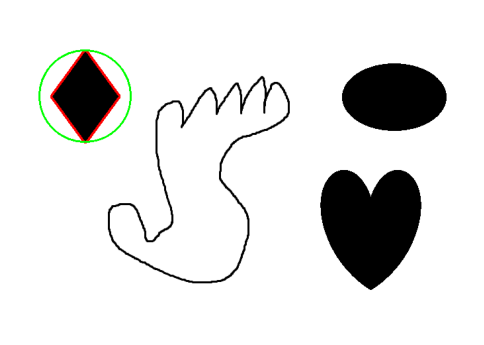

In [203]:
# 8. Minimum Enclosing Circle
cnt = contours[5]

# Vẽ Minimum Enclosing Circle cho contour này
(x,y), radius = cv.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)

im_draw = im.copy()
cv.drawContours(im_draw, [cnt], -1, (0,0,255), 2)  # vẽ contour gốc màu đỏ
cv.circle(im_draw, center, radius, (0,255,0), 2)   # vẽ đường tròn bao màu xanh

# Hiển thị ảnh
plt.figure(figsize=(6,6))
plt.imshow(cv.cvtColor(im_draw, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

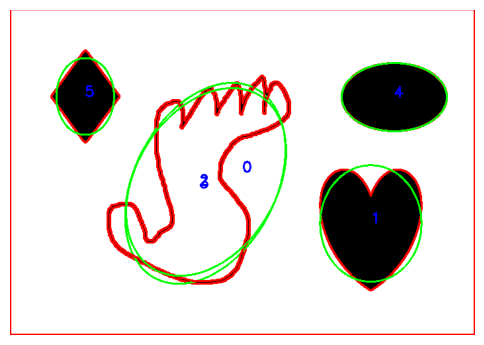

In [204]:
# 9. Fitting an Ellipse
im_draw = im.copy()

# Vẽ tất cả contours và ellipse
for i, cnt in enumerate(contours):
    # Vẽ contour đỏ
    cv.drawContours(im_draw, [cnt], -1, (0,0,255), 2)

    # Fit ellipse nếu đủ điểm
    if len(cnt) >= 5:
        ellipse = cv.fitEllipse(cnt)
        cv.ellipse(im_draw, ellipse, (0,255,0), 2)  # ellipse xanh

    # Đặt số thứ tự contour
    M = cv.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"]/M["m00"])
        cy = int(M["m01"]/M["m00"])
        cv.putText(im_draw, str(i), (cx, cy), cv.FONT_HERSHEY_SIMPLEX,
                   0.7, (255,0,0), 2)

# Hiển thị ảnh
plt.figure(figsize=(6,6))
plt.imshow(cv.cvtColor(im_draw, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

C:\Users\trinh\AppData\Local\Temp\ipykernel_12036\2961141737.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty  = int((-x0 * vy / vx) + y0)
C:\Users\trinh\AppData\Local\Temp\ipykernel_12036\2961141737.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols - x0) * vy / vx) + y0)


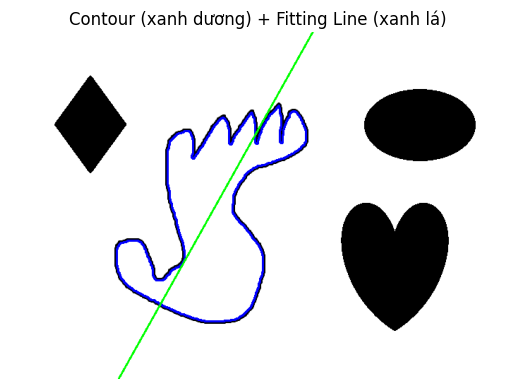

In [207]:
# 10. Fitting a Line
cnt = contours[3]   # chọn vật thể số 1 (thay đổi nếu muốn chọn vật thể khác)

im_draw = im.copy()
# Vẽ contour để dễ quan sát
cv.drawContours(im_draw, [cnt], -1, (255,0,0), 2)  # xanh dương

# Fit line
rows, cols = im.shape[:2]
[vx, vy, x0, y0] = cv.fitLine(cnt, cv.DIST_L2, 0, 0.01, 0.01)

# Tính 2 điểm đầu - cuối của line
lefty  = int((-x0 * vy / vx) + y0)
righty = int(((cols - x0) * vy / vx) + y0)

cv.line(im_draw, (cols-1, righty), (0, lefty), (0,255,0), 2)  # line xanh lá

# Hiển thị kết quả
plt.imshow(cv.cvtColor(im_draw, cv.COLOR_BGR2RGB))
plt.title("Contour (xanh dương) + Fitting Line (xanh lá)")
plt.axis("off")
plt.show()
